In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
df = pd.read_csv('reduction_benchmark.csv')
df['Time (s)'] = pd.to_numeric(df['Time (s)'], errors='coerce')
df = df.dropna(subset=['Time (s)'])
df = df.sort_values(by='Time (s)', ascending=True).reset_index(drop=True)
df.head()

,Test Case,Original Tokens,Reduced Tokens,Reduction (%),Time (s)
0,query7,619,21,96.61,2.31
1,query5,68,43,36.76,2.64
2,query17,10559,241,97.72,3.19
3,query4,955,108,88.69,3.51
4,query10,259,73,71.81,3.54


In [74]:
stats = df['Time (s)'].agg(['mean', 'min', 'max'])
print(stats)

mean    13.847
min      2.310
max     79.270
Name: Time (s), dtype: float64


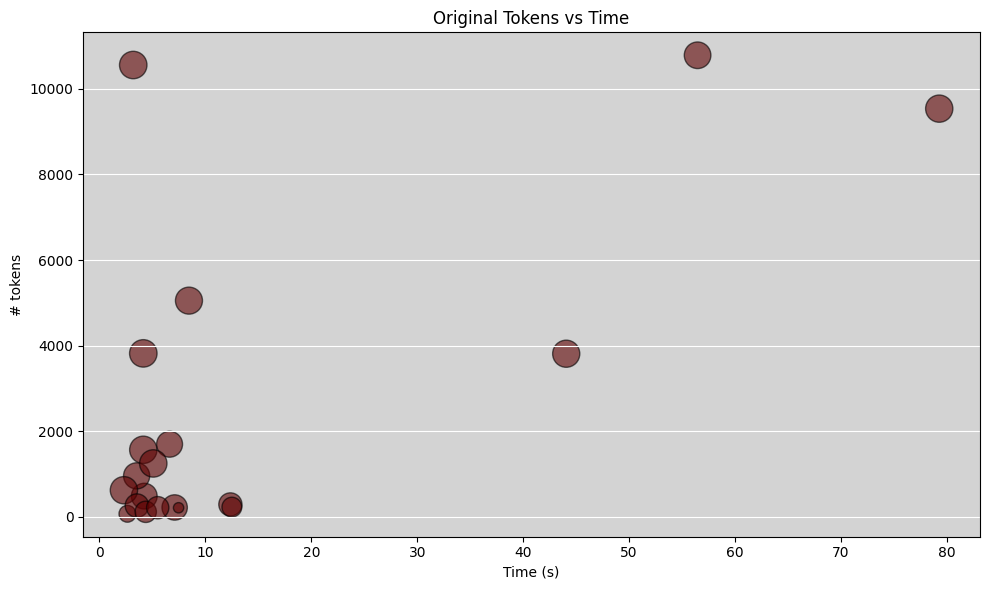

In [78]:
marker_sizes = df['Reduction (%)'] * 4  # You can tweak the multiplier

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Time (s)'], df['Original Tokens'], s=marker_sizes, color="#5e0101", alpha=0.6, edgecolors='black')

# Label axes and title
plt.xlabel('Time (s)')
plt.ylabel('# tokens')
plt.title('Original Tokens vs Time')
plt.tight_layout()
plt.gca().set_facecolor('lightgrey')  # Set background to light grey
plt.grid(True, axis='y', color='white')
plt.show()

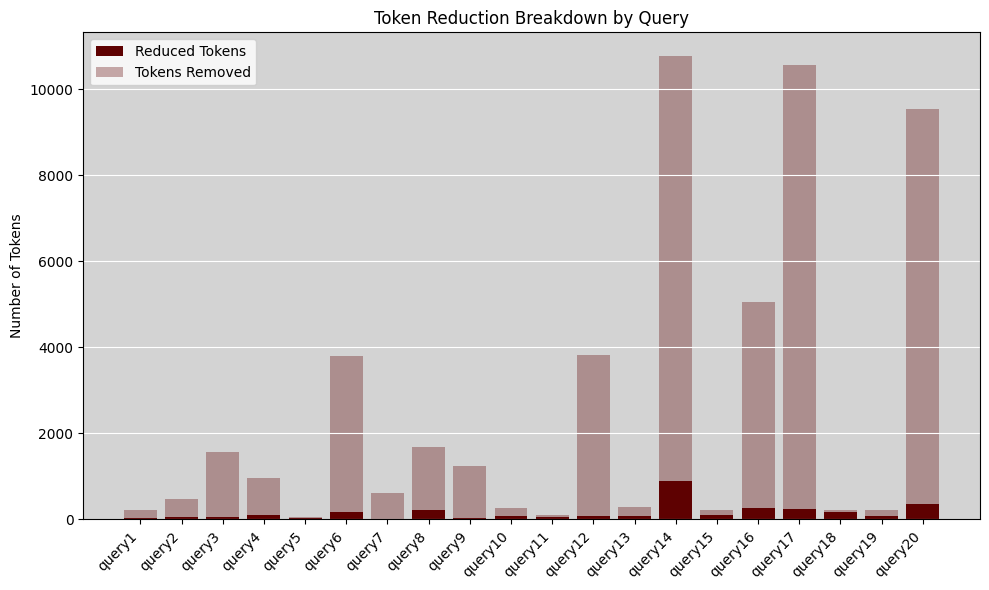

In [69]:
df = pd.read_csv('reduction_benchmark.csv')
labels = df['Test Case']
original = df['Original Tokens']
reduced = df['Reduced Tokens']

x = np.arange(len(labels))  # label locations
width = 0.35  # bar width


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, reduced, label='Reduced Tokens', color='#5e0101')
ax.bar(labels, original - reduced, bottom=reduced, label='Tokens Removed', color="#5e010153")

ax.set_ylabel('Number of Tokens')
ax.set_title('Token Reduction Breakdown by Query')
ax.legend()
ax.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.gca().set_facecolor('lightgrey')  # Set background to light grey
plt.grid(True, axis='y', color='white')

plt.tight_layout()
plt.show()


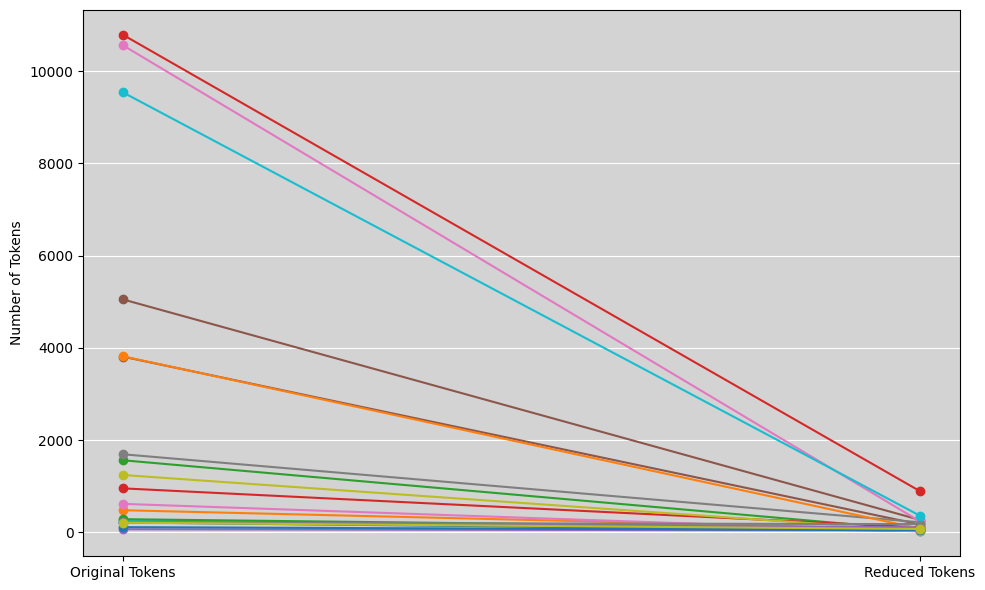

In [71]:

fig, ax = plt.subplots(figsize=(10, 6))

for i, label in enumerate(labels):
    ax.plot([0, 1], [original[i], reduced[i]], marker='o', label=label)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Original Tokens', 'Reduced Tokens'])
ax.set_ylabel('Number of Tokens')
plt.gca().set_facecolor('lightgrey')  # Set background to light grey
plt.grid(True, axis='y', color='white')
plt.tight_layout()
plt.show()